In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import sklearn as skl
import datetime as dt

C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages

In [2]:
biden_TH_df = pd.read_csv("Biden_Town_Hall.csv")

C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
biden_TH_df.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1316891604419022850,1316819884081393667,2020-10-15 19:59:59 Eastern Daylight Time,2020-10-15,19:59:59,-400,198605739,ghostflame9,Curtis A. Burns,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '939091', 'username': 'JoeBiden'}",NaN,NaN,NaN,NaN
1,1316891604230103040,1316888334594007040,2020-10-15 19:59:59 Eastern Daylight Time,2020-10-15,19:59:59,-400,750945724779663360,booksandrosesco,Books & Roses,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '963790885937995777', 'username': ...",NaN,NaN,NaN,NaN
2,1316891600723701761,1316891600723701761,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,1111704719750135809,newslyticsapp,Newslytics,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
3,1316891599876608000,1316891599876608000,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,19211817,gvb7862,GVB,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
4,1316891599834652672,1316513615373987840,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,404260554,stephaniepp128,🌊🌊🌊Steph🌊🌊🌊,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '939091', 'username': 'JoeBiden'}",NaN,NaN,NaN,NaN


In [4]:
biden_TH_df.dtypes

id                   int64
conversation_id      int64
created_at          object
date                object
time                object
timezone             int64
user_id              int64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet            float64
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [5]:
biden_TH_df.isnull().sum(axis = 0)

id                      0
conversation_id         0
created_at              0
date                    0
time                    0
timezone                0
user_id                 0
username                0
name                   59
place              465327
tweet                   0
language                0
mentions                0
urls                    0
photos                  0
replies_count           0
retweets_count          0
likes_count             0
hashtags                0
cashtags                0
link                    0
retweet            465375
quote_url          433913
video                   0
thumbnail          410766
near               465375
geo                465375
source             465375
user_rt_id         465375
user_rt            465375
retweet_id         465375
reply_to                0
retweet_date       465375
translate          465375
trans_src          465375
trans_dest         465375
dtype: int64

In [6]:
biden_TH_df.shape

(465375, 36)

In [7]:
columns = ["place", "retweet", "quote_url", "near", "geo", "source", "user_rt_id", "user_rt", "retweet_date", "retweet_id", "translate", "trans_src", "trans_dest"]

In [8]:
biden_TH_df.drop(columns, axis=1, inplace=True)

In [9]:
biden_TH_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to
0,1316891604419022850,1316819884081393667,2020-10-15 19:59:59 Eastern Daylight Time,2020-10-15,19:59:59,-400,198605739,ghostflame9,Curtis A. Burns,@JoeBiden Are you shitting me? Booming economy?!,...,[],0,0,1,[],[],https://twitter.com/ghostflame9/status/1316891...,0,NaN,"{'user_id': '939091', 'username': 'JoeBiden'}"
1,1316891604230103040,1316888334594007040,2020-10-15 19:59:59 Eastern Daylight Time,2020-10-15,19:59:59,-400,750945724779663360,booksandrosesco,Books & Roses,@HKrassenstein @JoeBiden @ABC #WatchBidensTown...,...,[],0,1,2,"['watchbidenstownhall', 'votebidenharris2020']",[],https://twitter.com/BooksandRosesCo/status/131...,0,NaN,"{'user_id': '963790885937995777', 'username': ..."
2,1316891600723701761,1316891600723701761,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,1111704719750135809,newslyticsapp,Newslytics,Joe Biden and Kamala Harris both flew on fligh...,...,['https://pbs.twimg.com/media/EkaJ7WCUYAEQIQf....,0,1,0,"['covid19', 'analytics', 'coronavirus', 'biden...",[],https://twitter.com/newslyticsapp/status/13168...,1,https://pbs.twimg.com/media/EkaJ7WCUYAEQIQf.jpg,"{'user_id': None, 'username': None}"
3,1316891599876608000,1316891599876608000,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,19211817,gvb7862,GVB,scary that @FBI had laptop since Dec 2019 feel...,...,[],0,1,1,"['usa', 'election2020']",[],https://twitter.com/gvb7862/status/13168915998...,0,NaN,"{'user_id': None, 'username': None}"
4,1316891599834652672,1316513615373987840,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,404260554,stephaniepp128,🌊🌊🌊Steph🌊🌊🌊,@JoeBiden It felt really good voting this time...,...,['https://pbs.twimg.com/media/EkaJ2caWkAEiL6V....,1,0,1,[],[],https://twitter.com/Stephaniepp128/status/1316...,1,https://pbs.twimg.com/media/EkaJ2caWkAEiL6V.jpg,"{'user_id': '939091', 'username': 'JoeBiden'}"


In [10]:
biden_TH_df.timezone.value_counts()

-400    465375
Name: timezone, dtype: int64

In [11]:
biden_TH_df.user_id.value_counts()

732834170897084416     255
1306644454002946053    222
1309332067394686978    214
108091475              198
863491279              183
                      ... 
1300808207770832896      1
1306272004840988673      1
1309087555246329856      1
1269273302046048256      1
38704705                 1
Name: user_id, Length: 173502, dtype: int64

In [12]:
biden_TH_df.username.nunique()

173505

In [13]:
tweet_time = biden_TH_df.time.value_counts()
tweet_time

17:30:00    40
11:29:12    34
11:57:18    32
16:10:15    30
17:24:09    30
            ..
04:29:02     1
04:21:37     1
04:01:27     1
03:53:57     1
02:25:20     1
Name: time, Length: 69143, dtype: int64

In [14]:
biden_TH_df["hour"]=pd.to_datetime(biden_TH_df['time'], format='%H:%M:%S').dt.hour

In [15]:
hours=biden_TH_df.hour.value_counts()

In [16]:
biden_TH_df.hour.index

RangeIndex(start=0, stop=465375, step=1)

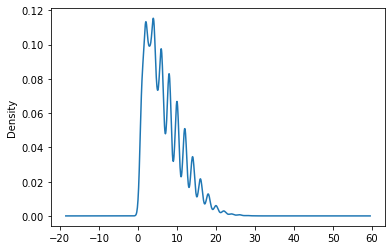

In [17]:
# Visualize the value counts
tweet_time.plot.density()

In [18]:
tweet_time.index

Index(['17:30:00', '11:29:12', '11:57:18', '16:10:15', '17:24:09', '13:58:51',
       '14:00:00', '11:01:43', '11:14:47', '10:30:53',
       ...
       '04:00:26', '04:53:06', '04:09:04', '02:47:42', '02:58:48', '04:29:02',
       '04:21:37', '04:01:27', '03:53:57', '02:25:20'],
      dtype='object', length=69143)

In [19]:
hours

17    41637
11    37118
16    35509
19    35292
13    34315
14    34298
12    33509
10    31595
15    30736
18    27869
0     21987
9     18930
8     16640
1     13715
7     13379
6      9703
2      9604
3      7110
5      6660
4      5769
Name: hour, dtype: int64

In [20]:
hours.sort_index(ascending=True, inplace=True)

In [21]:
hours

0     21987
1     13715
2      9604
3      7110
4      5769
5      6660
6      9703
7     13379
8     16640
9     18930
10    31595
11    37118
12    33509
13    34315
14    34298
15    30736
16    35509
17    41637
18    27869
19    35292
Name: hour, dtype: int64

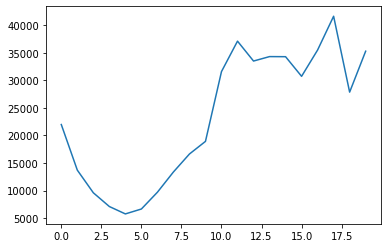

In [22]:
hours.plot()

In [23]:
def cleaned_tweet (row):
    clean_tweet=row["tweet"]
    s = []
    for word in clean_tweet.split():
        if '@' not in word and 'https' not in word and '#' not in word:
            s.append(word)
    return (' ').join(s)

In [24]:
def label_na (row):
    if len(row['cleaned_tweet'].strip())==0: 
        return np.NaN
    else:
        return row["cleaned_tweet"]

In [25]:
biden_TH_df["cleaned_tweet"]=biden_TH_df.apply (lambda row: cleaned_tweet(row), axis=1)

In [26]:
biden_TH_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,hour,cleaned_tweet
0,1316891604419022850,1316819884081393667,2020-10-15 19:59:59 Eastern Daylight Time,2020-10-15,19:59:59,-400,198605739,ghostflame9,Curtis A. Burns,@JoeBiden Are you shitting me? Booming economy?!,...,0,1,[],[],https://twitter.com/ghostflame9/status/1316891...,0,NaN,"{'user_id': '939091', 'username': 'JoeBiden'}",19,Are you shitting me? Booming economy?!
1,1316891604230103040,1316888334594007040,2020-10-15 19:59:59 Eastern Daylight Time,2020-10-15,19:59:59,-400,750945724779663360,booksandrosesco,Books & Roses,@HKrassenstein @JoeBiden @ABC #WatchBidensTown...,...,1,2,"['watchbidenstownhall', 'votebidenharris2020']",[],https://twitter.com/BooksandRosesCo/status/131...,0,NaN,"{'user_id': '963790885937995777', 'username': ...",19,then
2,1316891600723701761,1316891600723701761,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,1111704719750135809,newslyticsapp,Newslytics,Joe Biden and Kamala Harris both flew on fligh...,...,1,0,"['covid19', 'analytics', 'coronavirus', 'biden...",[],https://twitter.com/newslyticsapp/status/13168...,1,https://pbs.twimg.com/media/EkaJ7WCUYAEQIQf.jpg,"{'user_id': None, 'username': None}",19,Joe Biden and Kamala Harris both flew on fligh...
3,1316891599876608000,1316891599876608000,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,19211817,gvb7862,GVB,scary that @FBI had laptop since Dec 2019 feel...,...,1,1,"['usa', 'election2020']",[],https://twitter.com/gvb7862/status/13168915998...,0,NaN,"{'user_id': None, 'username': None}",19,scary that had laptop since Dec 2019 feels lik...
4,1316891599834652672,1316513615373987840,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,404260554,stephaniepp128,🌊🌊🌊Steph🌊🌊🌊,@JoeBiden It felt really good voting this time...,...,0,1,[],[],https://twitter.com/Stephaniepp128/status/1316...,1,https://pbs.twimg.com/media/EkaJ2caWkAEiL6V.jpg,"{'user_id': '939091', 'username': 'JoeBiden'}",19,It felt really good voting this time around!!! 💙


In [27]:
import re
import numpy as np

In [28]:
biden_TH_df['cleaned_tweet'] = biden_TH_df['cleaned_tweet'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

In [29]:
biden_TH_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,hour,cleaned_tweet
0,1316891604419022850,1316819884081393667,2020-10-15 19:59:59 Eastern Daylight Time,2020-10-15,19:59:59,-400,198605739,ghostflame9,Curtis A. Burns,@JoeBiden Are you shitting me? Booming economy?!,...,0,1,[],[],https://twitter.com/ghostflame9/status/1316891...,0,NaN,"{'user_id': '939091', 'username': 'JoeBiden'}",19,Are you shitting me Booming economy
1,1316891604230103040,1316888334594007040,2020-10-15 19:59:59 Eastern Daylight Time,2020-10-15,19:59:59,-400,750945724779663360,booksandrosesco,Books & Roses,@HKrassenstein @JoeBiden @ABC #WatchBidensTown...,...,1,2,"['watchbidenstownhall', 'votebidenharris2020']",[],https://twitter.com/BooksandRosesCo/status/131...,0,NaN,"{'user_id': '963790885937995777', 'username': ...",19,then
2,1316891600723701761,1316891600723701761,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,1111704719750135809,newslyticsapp,Newslytics,Joe Biden and Kamala Harris both flew on fligh...,...,1,0,"['covid19', 'analytics', 'coronavirus', 'biden...",[],https://twitter.com/newslyticsapp/status/13168...,1,https://pbs.twimg.com/media/EkaJ7WCUYAEQIQf.jpg,"{'user_id': None, 'username': None}",19,Joe Biden and Kamala Harris both flew on fligh...
3,1316891599876608000,1316891599876608000,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,19211817,gvb7862,GVB,scary that @FBI had laptop since Dec 2019 feel...,...,1,1,"['usa', 'election2020']",[],https://twitter.com/gvb7862/status/13168915998...,0,NaN,"{'user_id': None, 'username': None}",19,scary that had laptop since Dec 2019 feels lik...
4,1316891599834652672,1316513615373987840,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,404260554,stephaniepp128,🌊🌊🌊Steph🌊🌊🌊,@JoeBiden It felt really good voting this time...,...,0,1,[],[],https://twitter.com/Stephaniepp128/status/1316...,1,https://pbs.twimg.com/media/EkaJ2caWkAEiL6V.jpg,"{'user_id': '939091', 'username': 'JoeBiden'}",19,It felt really good voting this time around


In [30]:
len(biden_TH_df['cleaned_tweet'][4].strip())

43

In [31]:
biden_TH_df["cleaned_tweet"]=biden_TH_df.apply (lambda row: label_na(row), axis=1)

In [32]:
biden_TH_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,hour,cleaned_tweet
0,1316891604419022850,1316819884081393667,2020-10-15 19:59:59 Eastern Daylight Time,2020-10-15,19:59:59,-400,198605739,ghostflame9,Curtis A. Burns,@JoeBiden Are you shitting me? Booming economy?!,...,0,1,[],[],https://twitter.com/ghostflame9/status/1316891...,0,NaN,"{'user_id': '939091', 'username': 'JoeBiden'}",19,Are you shitting me Booming economy
1,1316891604230103040,1316888334594007040,2020-10-15 19:59:59 Eastern Daylight Time,2020-10-15,19:59:59,-400,750945724779663360,booksandrosesco,Books & Roses,@HKrassenstein @JoeBiden @ABC #WatchBidensTown...,...,1,2,"['watchbidenstownhall', 'votebidenharris2020']",[],https://twitter.com/BooksandRosesCo/status/131...,0,NaN,"{'user_id': '963790885937995777', 'username': ...",19,then
2,1316891600723701761,1316891600723701761,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,1111704719750135809,newslyticsapp,Newslytics,Joe Biden and Kamala Harris both flew on fligh...,...,1,0,"['covid19', 'analytics', 'coronavirus', 'biden...",[],https://twitter.com/newslyticsapp/status/13168...,1,https://pbs.twimg.com/media/EkaJ7WCUYAEQIQf.jpg,"{'user_id': None, 'username': None}",19,Joe Biden and Kamala Harris both flew on fligh...
3,1316891599876608000,1316891599876608000,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,19211817,gvb7862,GVB,scary that @FBI had laptop since Dec 2019 feel...,...,1,1,"['usa', 'election2020']",[],https://twitter.com/gvb7862/status/13168915998...,0,NaN,"{'user_id': None, 'username': None}",19,scary that had laptop since Dec 2019 feels lik...
4,1316891599834652672,1316513615373987840,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,404260554,stephaniepp128,🌊🌊🌊Steph🌊🌊🌊,@JoeBiden It felt really good voting this time...,...,0,1,[],[],https://twitter.com/Stephaniepp128/status/1316...,1,https://pbs.twimg.com/media/EkaJ2caWkAEiL6V.jpg,"{'user_id': '939091', 'username': 'JoeBiden'}",19,It felt really good voting this time around


In [33]:
biden_TH_df = biden_TH_df[biden_TH_df['cleaned_tweet'].notna()]

In [34]:
biden_TH_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,hour,cleaned_tweet
0,1316891604419022850,1316819884081393667,2020-10-15 19:59:59 Eastern Daylight Time,2020-10-15,19:59:59,-400,198605739,ghostflame9,Curtis A. Burns,@JoeBiden Are you shitting me? Booming economy?!,...,0,1,[],[],https://twitter.com/ghostflame9/status/1316891...,0,NaN,"{'user_id': '939091', 'username': 'JoeBiden'}",19,Are you shitting me Booming economy
1,1316891604230103040,1316888334594007040,2020-10-15 19:59:59 Eastern Daylight Time,2020-10-15,19:59:59,-400,750945724779663360,booksandrosesco,Books & Roses,@HKrassenstein @JoeBiden @ABC #WatchBidensTown...,...,1,2,"['watchbidenstownhall', 'votebidenharris2020']",[],https://twitter.com/BooksandRosesCo/status/131...,0,NaN,"{'user_id': '963790885937995777', 'username': ...",19,then
2,1316891600723701761,1316891600723701761,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,1111704719750135809,newslyticsapp,Newslytics,Joe Biden and Kamala Harris both flew on fligh...,...,1,0,"['covid19', 'analytics', 'coronavirus', 'biden...",[],https://twitter.com/newslyticsapp/status/13168...,1,https://pbs.twimg.com/media/EkaJ7WCUYAEQIQf.jpg,"{'user_id': None, 'username': None}",19,Joe Biden and Kamala Harris both flew on fligh...
3,1316891599876608000,1316891599876608000,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,19211817,gvb7862,GVB,scary that @FBI had laptop since Dec 2019 feel...,...,1,1,"['usa', 'election2020']",[],https://twitter.com/gvb7862/status/13168915998...,0,NaN,"{'user_id': None, 'username': None}",19,scary that had laptop since Dec 2019 feels lik...
4,1316891599834652672,1316513615373987840,2020-10-15 19:59:58 Eastern Daylight Time,2020-10-15,19:59:58,-400,404260554,stephaniepp128,🌊🌊🌊Steph🌊🌊🌊,@JoeBiden It felt really good voting this time...,...,0,1,[],[],https://twitter.com/Stephaniepp128/status/1316...,1,https://pbs.twimg.com/media/EkaJ2caWkAEiL6V.jpg,"{'user_id': '939091', 'username': 'JoeBiden'}",19,It felt really good voting this time around


In [35]:
##CONVERT TO CSV
biden_TH_df.to_csv('super_clean_bidenTH.csv', index = False)